In [2]:
from vega_datasets import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [4]:
df = data.sf_temps()

In [5]:
# sets index to date
df = df.set_index('date')

In [55]:
df = df.sort_index()

In [7]:
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [8]:
#sets new df to only include days from the original df via resample then takes the average temp per day
average_temperature = df.resample('D').mean()

In [9]:
average_temperature

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

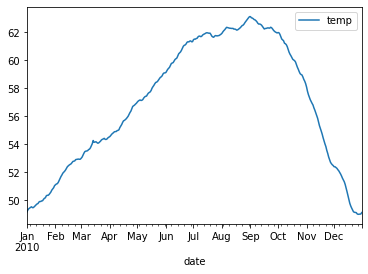

In [10]:
#line graph of average temperature
average_temperature.plot()

<AxesSubplot:xlabel='date'>

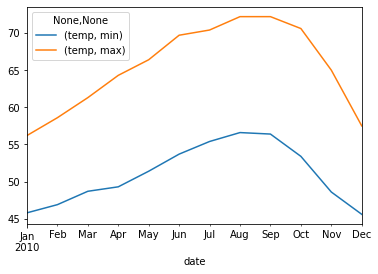

In [11]:
#ploting both min and max temps
df.resample('M').agg(['min', 'max']).plot()

In [12]:
#coldest month on average
df.resample('M').mean().sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


In [13]:
#hottest month on average
df.resample("M").mean().sort_values(by="temp", ascending=False).head(1)

,temp
date,
2010-09-30,62.487083


In [14]:
df.resample('D').agg(['min', 'max'])

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [58]:
#resample to day and min and max temps with change per day
temp_var=df.resample('D').agg(['min', 'max'])
temp_var["temp_change"] = temp_var["temp"]["max"] - temp_var["temp"]["min"] #creates new column with the difference between min and max temps per day
temp_var.temp_change.sort_values(ascending=False).head(1) #sorts by temp_change and returns the highest value


date
2010-08-31    15.0
Name: temp_change, dtype: float64

In [18]:
seattle_weather=data.seattle_weather() 
seattle_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [20]:
seattle_weather = seattle_weather.set_index('date')

In [21]:
seattle_weather.resample('M').mean().sort_values(by='precipitation', ascending=False).head(1)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.177419,8.380645,3.825806,4.341935


In [22]:
seattle_rain = seattle_weather.precipitation
seattle_wind = seattle_weather.wind
seattle_skys = seattle_weather.weather

<AxesSubplot:xlabel='date'>

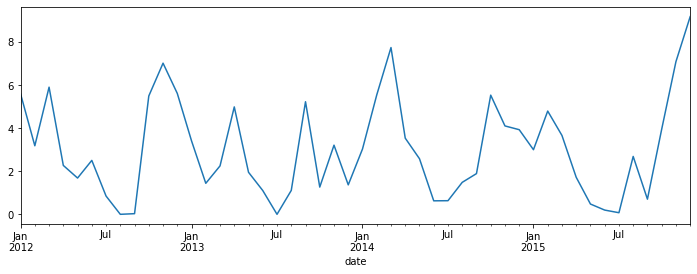

In [23]:
plt.figure(figsize=(12, 4))
seattle_rain.resample("M").mean().plot()



<AxesSubplot:xlabel='date'>

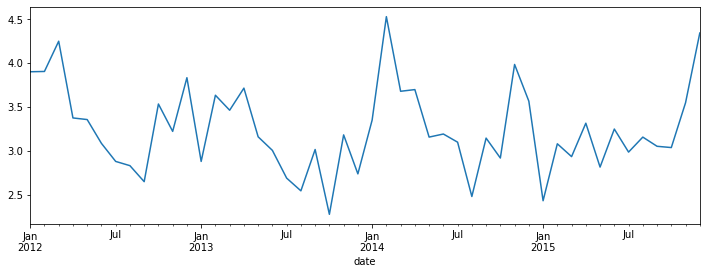

In [24]:
plt.figure(figsize=(12, 4))
seattle_wind.resample("M").mean().plot()

In [25]:
#the windiest month is feb 2014

In [26]:
seattle_skys.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [27]:
#sunnies year
seattle_skys[seattle_skys == 'sun'].resample('Y').count().sort_values(ascending=False).head(1)
#boolian mask for sunny days then resample to year and count the number of sunny days per year



date
2014-12-31    211
Name: weather, dtype: int64

In [59]:
#or you can 
seattle_skys[seattle_skys == 'sun'].resample('Y').count().idxmax() #returns the year with the most sunny days by sorting the index by the highest value

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

In [28]:
#the rainiest month
seattle_skys[seattle_skys == "rain"].resample("M").count().sort_values(ascending=False).head(1)

date
2012-11-30    25
Name: weather, dtype: int64

In [60]:
# which month has the most number of days with a non-zero amount of precipitation
nasty_days = seattle_skys[seattle_skys.isin(["rain", "snow", "drizzle"])]
nasty_days.resample("M").count().sort_values(ascending=False).head(1)   

date
2012-12-31    30
Name: weather, dtype: int64

In [31]:
flights_20k=data.flights_20k()  

In [34]:
flights_20k=flights_20k.set_index('date')

In [35]:
#negative values in delay column set to 0
flights_20k.delay = flights_20k.delay.apply(lambda x: 0 if x < 0 else x) #lambda sets x to 0 if x is less than 0, else it sets it to x
flights_20k.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [40]:
flights_20k = flights_20k.sort_index()

In [42]:
flights_20k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


In [47]:
#average delay by hour of day
flights_20k.groupby(flights_20k.index.hour).delay.mean().sort_values(ascending=False).head(1)  
#groups by hour because it is the index use .index.hour to get the hour of the index 
#then get the mean of the delay column

date
3    302.5
Name: delay, dtype: float64

In [52]:
#sorting by day of week and getting the average delay
flights_20k.groupby(flights_20k.index.day_name()).delay.mean().sort_values(ascending=False)

date
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

In [ ]:
#yes

In [53]:
flights_20k.groupby(flights_20k.index.month).delay.mean().sort_values(ascending=False)

date
2    12.306106
1    11.301592
3     9.875287
Name: delay, dtype: float64

In [ ]:
#yes